# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/ming/Downloads/hospital_readmit/data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


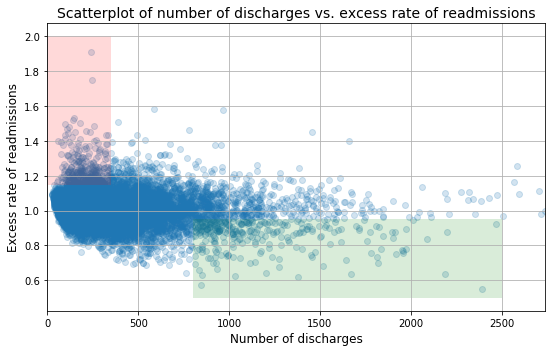

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [8]:
# Your turn
#Do you agree with the above analysis and recommendations? Why or why not?

I cannot agree with the above analysis because it lacks any statistical significance test and correlation coefficient estimation to support the conclusions. The conclusions are drawn based on the plot, but not all data points under same range of hospital size are included. For example, the area shaded red only covers small amount of observations from small hospital, not all the data points. Because of that, selection bias is introduced.

In [9]:
# to remove the null values and reset index
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())][['Number of Discharges','Excess Readmission Ratio']]
df.reset_index(drop=True, inplace=True)
df.head()

,Number of Discharges,Excess Readmission Ratio
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [18]:
#to check the correlation
df.corr(method='pearson')

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


## 1. Setup an appropriate hypothesis test.

Small hospitals(number of discharges < 350)

Large hospitals(number of discharges > 350)

H0: Difference in the readmission rates between small and large hospitals = 0

H1: Difference in the readmission rates between small and large hospitals != 0

## 2. Compute and report the observed significance value (or p-value).

In [10]:
s = df[df['Number of Discharges'] <= 350]
l = df[df['Number of Discharges'] >= 350]
print('No. of observations for small hospitals:', len(s))
print('No. of observations for large hospitals:', len(l))

No. of observations for small hospitals: 7009
No. of observations for large hospitals: 4499


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


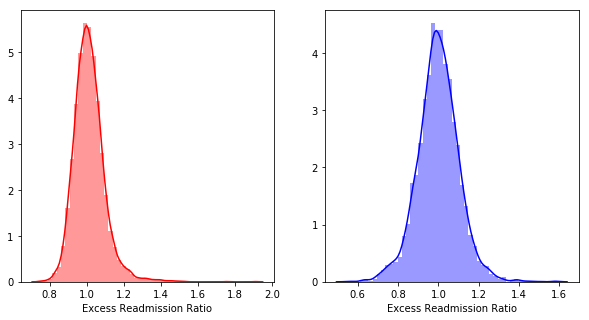

In [11]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot a historgram and kernel density estimate
sns.distplot(s['Excess Readmission Ratio'],color="r", ax=axes[0])
sns.distplot(l['Excess Readmission Ratio'],color="b", ax=axes[1]);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


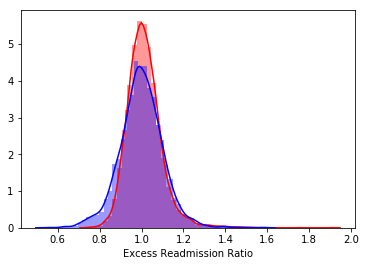

In [12]:
sns.distplot(s['Excess Readmission Ratio'],color="r")
sns.distplot(l['Excess Readmission Ratio'],color="b");

In [13]:
from scipy import stats
# sample mean of excess readmission ratio
m_s = s['Excess Readmission Ratio'].mean()
m_l = l['Excess Readmission Ratio'].mean()
m_diff = m_s - m_l
print('Sample mean of readmission rate of small hospital: %.4f' %m_s)
print('Sample mean of readmission rate of large hospital: %.4f' %m_l)
print ('Sample mean difference:', m_diff)

Sample mean of readmission rate of small hospital: 1.0133
Sample mean of readmission rate of large hospital: 0.9984
Sample mean difference: 0.014840741131386226


In [14]:
# assumed H0 is correct such that m_s = m_l
μ_diff = 0 # null-hypothesis of mean

var_s = s['Excess Readmission Ratio'].std()**2 
var_l = l['Excess Readmission Ratio'].std()**2
# std of sample mean difference:
σ_diff = np.sqrt(var_s/len(s) + var_l/len(l))

z = (m_diff - μ_diff) / σ_diff
pval_z= 2* (1-stats.norm.cdf(abs(z)))
print('z-statistic: ',z, ' p-value: ', pval_z)

z-statistic:  8.105339363256586  p-value:  4.440892098500626e-16


## 3. Report statistical significance for $\alpha$ = .01.

In [15]:
#Report statistical significance for  α= 0.01
# with 99% CI, margin of error, distance from real mean difference
m_e=2.58*σ_diff # z=2.58 for 99% confidence interval
print('Margin of error %.4f' % m_e)

confidence_interval = [m_diff-m_e, m_diff+m_e]
print ('99% Confidence Interval:',  confidence_interval)

Margin of error 0.0047
99% Confidence Interval: [0.010116804180325295, 0.019564678082447155]


Since the computed p-value is smaller than the selected alpha level, 0.01, we should reject the null hypothesis. Such that there is statistical significant difference between the readmission rate of small and big hospitals. And reasmission rate of small hospital is higher than big hospital by 1 to 2% with 99% confidence.

## 4. Discuss statistical significance and practical significance.

Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance determines whether a result is due to chance or sampling variability, while practical significance determines whether the result is useful in the real world.

The statistical significance here supports that reasmission rate of small hospital is higher than big hospital by 1-2%. The practical significance shows that the correlation between the size of the hospital and readmission rate is insignificant, 0.0974. I would recommend the client not to pick the hospital based on the size only.

## 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The advantage is that the plot shows the relationship between two variables generally. The disadvantage is that it is unable to give the exact extent of correlation or quantitative measure of the relationship between the variables.

To obtain the correlation between number of discharge and readmssion rate directly, a best fit line can be added to visualize the correlation, or a Hexbin plot can be used. Hexbin plot is useful to represent the relationship of two numerical variables for a lot of data point. The number of data points are denoted by the color instead of by overlapping. And the correlation between the variables are computed.

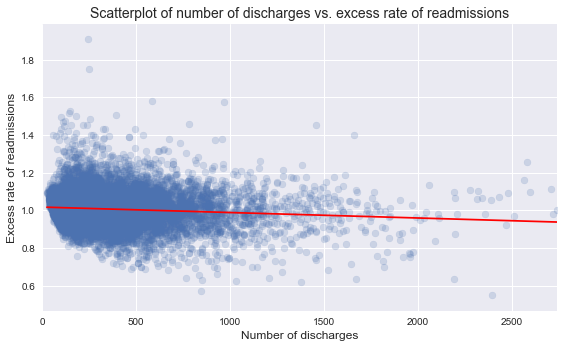

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.plot(np.unique(df['Number of Discharges']), 
        np.poly1d(np.polyfit(df['Number of Discharges'], df['Excess Readmission Ratio'], 1))
        (np.unique(df['Number of Discharges'])), color='red')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


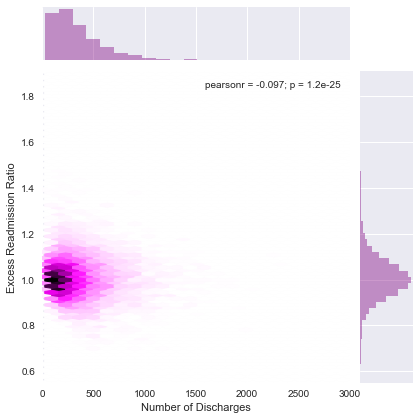

In [27]:
sns.set()
sns.jointplot(df['Number of Discharges'], df['Excess Readmission Ratio'], 
              kind='hex', color='purple', xlim=(0, 3000), gridsize=(50,50));